In [ ]:
pip install skimpy tqdm fasttext

In [5]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from collections import Counter
import re
import nltk
from sklearn.model_selection import train_test_split
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import spacy
import gensim.downloader as api
from keras.preprocessing.text import Tokenizer
from keras.callbacks import History
from tqdm import tqdm
import fasttext
from skimpy import skim

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/spotify-app-reviews-2022/reviews.csv')
df

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN
...,...,...,...,...,...
61589,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6,NaN
61590,2022-01-01 02:13:40,"Use to be sooo good back when I had it, and wh...",1,0,NaN
61591,2022-01-01 01:02:29,This app would be good if not for it taking ov...,2,10,NaN
61592,2022-01-01 00:49:23,The app is good hard to navigate and won't jus...,2,1,NaN


In [47]:
df = df.drop(['Time_submitted', 'Total_thumbsup', 'Reply'], axis=1)

In [11]:
df

,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1
...,...,...
61589,Even though it was communicated that lyrics fe...,1
61590,"Use to be sooo good back when I had it, and wh...",1
61591,This app would be good if not for it taking ov...,2
61592,The app is good hard to navigate and won't jus...,2


In [12]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 61594  │ │ string      │ 1     │                                                          │
│ │ Number of columns │ 2      │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean     ┃ sd     ┃ p0    ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ Rating              │     0 │        0 │      3.2 │    1.7 │     1 │      1 │      5 │       5 │  ▆▃ ▂▃█   │  │
│ └─────────────────────┴───────┴──────────┴──────────┴────────┴───────┴────────┴────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Review                    │       0 │          0 │                           31 │                  1902418 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [23]:
notes = df['Rating'].value_counts()

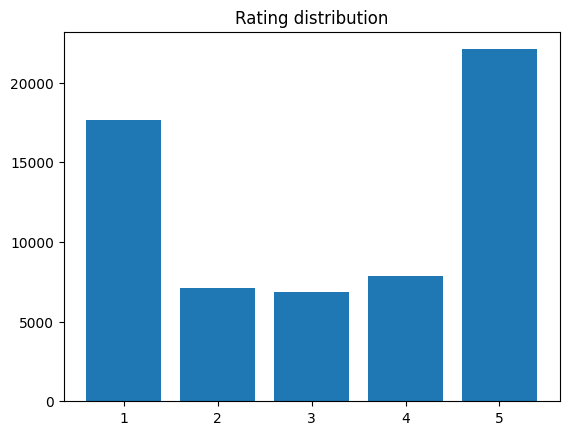

In [26]:
plt.bar(notes.index,notes.values)
plt.title('Rating distribution')
plt.show()

In [27]:
#unbalanced

In [30]:
df['Review'].head(20)

0     Great music service, the audio is high quality...
1     Please ignore previous negative rating. This a...
2     This pop-up "Get the best Spotify experience o...
3       Really buggy and terrible to use as of recently
4     Dear Spotify why do I get songs that I didn't ...
5     The player controls sometimes disappear for no...
6     I love the selection and the lyrics are provid...
7     Still extremely slow when changing storage to ...
8     It's a great app and the best mp3 music app I ...
9     I'm deleting this app, for the following reaso...
10    Love Spotify, and usually this app is the best...
11                      Can't play Spotify when on WiFi
12    I had amazon premium music family package and ...
13    Worst app always says I'm offline and never sh...
14             i hav any music that i like it is super🙌
15    Improve the IA to recommend songs and to find ...
16    Android user - there are loads of glitches wit...
17    I can't listen to my DOWNLOADED playlist w

In [48]:
df = df.drop_duplicates()

In [36]:
df.duplicated().sum()

0

In [49]:
df.shape

(61393, 2)

In [38]:
import re

In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [52]:
def cleaning(text):
  text=text.lower()

  text=re.sub("\[.*#&]"," ",text)

  text=re.sub("https?://\S+|www\.\S+","",text)

  text=re.sub("[^a-zA-Z0-9\s]+","",text)

  text=re.sub('\w*\d\w*', '', text)

  sw = set(stopwords.words('english'))

  w = text.split()

  w_without_sw = [i for i in w if i not in sw]
  text = ' '.join(w_without_sw)
  text = re.sub('\s+', ' ', text).strip()

  return text

In [53]:
df['Review'] = df['Review'].apply(cleaning)

In [43]:
df

,Review,Rating
0,great music service audio high quality app eas...,5
1,please ignore previous negative rating app sup...,5
2,popup get best spotify experience android anno...,4
3,really buggy terrible use recently,1
4,dear spotify get songs didnt put playlist shuf...,1
...,...,...
61589,even though communicated lyrics feature availa...,1
61590,use sooo good back downloaded free version cou...,1
61591,app would good taking device start comp theres...,2
61592,app good hard navigate wont let play song clic...,2


In [67]:
df['Review'].head(20)

0     great music service audio high quality app eas...
1     please ignore previous negative rating app sup...
2     popup get best spotify experience android anno...
3                    really buggy terrible use recently
4     dear spotify get songs didnt put playlist shuf...
5     player controls sometimes disappear reason app...
6     love selection lyrics provided song youre list...
7     still extremely slow changing storage external...
8     great app best music app ever used one problem...
9     im deleting app following reasons app failing ...
10    love spotify usually app best others stated co...
11                               cant play spotify wifi
12    amazon premium music family package good every...
13    worst app always says im offline never showed ...
14                                 hav music like super
15    improve ia recommend songs find similar songs ...
16    android user loads glitches app player bar dis...
17    cant listen downloaded playlist im offline

In [68]:
from nltk.stem.snowball import SnowballStemmer

In [69]:
def stemming(text):
  stemmer = SnowballStemmer(language = 'english')
  words = [stemmer.stem(word) for word in text.split()]
  return " ".join(words)

In [70]:
df['Review'] = df['Review'].apply(stemming)

In [75]:
df.head()

,Review,Rating
0,great music servic audio high qualiti app easi...,5
1,pleas ignor previous negat rate app super grea...,5
2,popup get best spotifi experi android annoy pl...,4
3,realli buggi terribl use recent,1
4,dear spotifi get song didnt put playlist shuff...,1


In [77]:
def plot_most_common_words(df, Rating, n=10):
    counter = Counter(" ".join(df[df.Rating == Rating]['Review']).split())
    most_common = counter.most_common(n)
    words, counts = zip(*most_common)

    plt.barh(words, counts)
    plt.xlabel('Counts')
    plt.ylabel('Words')
    plt.title(f'Most Common Words for a rating of {Rating}')
    plt.show()

In [78]:
df['Rating'].unique()

array([5, 4, 1, 3, 2])

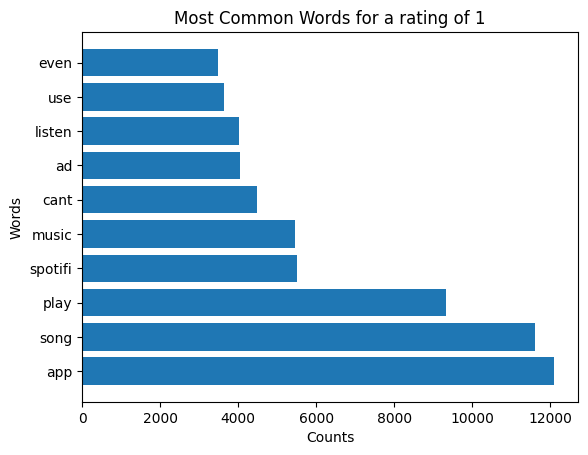

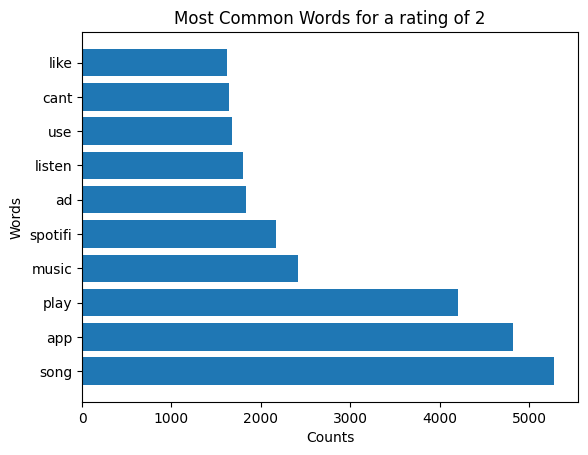

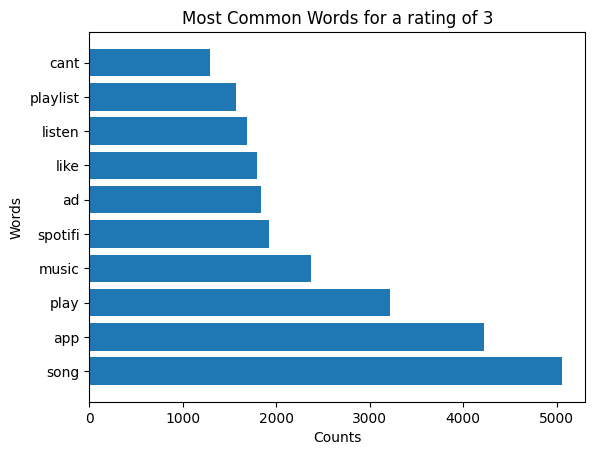

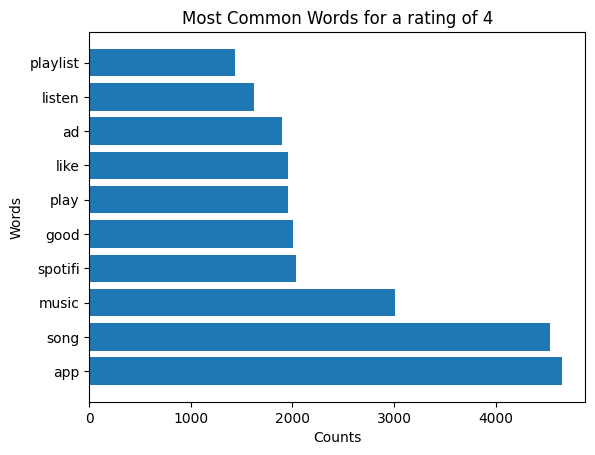

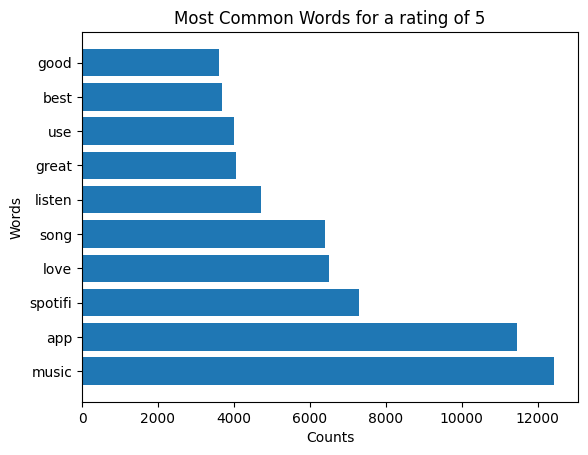

In [79]:
for i in [1,2,3,4,5]:
  plot_most_common_words(df,i)

In [81]:
from wordcloud import WordCloud

In [84]:
def wc_most_commons_words(df, Rating):
    text = " ".join(df[df.Rating == Rating]['Review'])
    plt.figure(figsize = (10, 8))
    wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'wordmap {Rating}')
    plt.show()

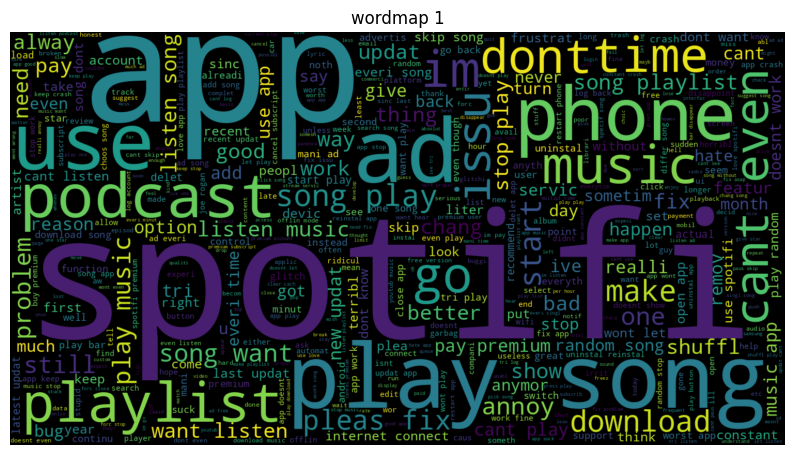

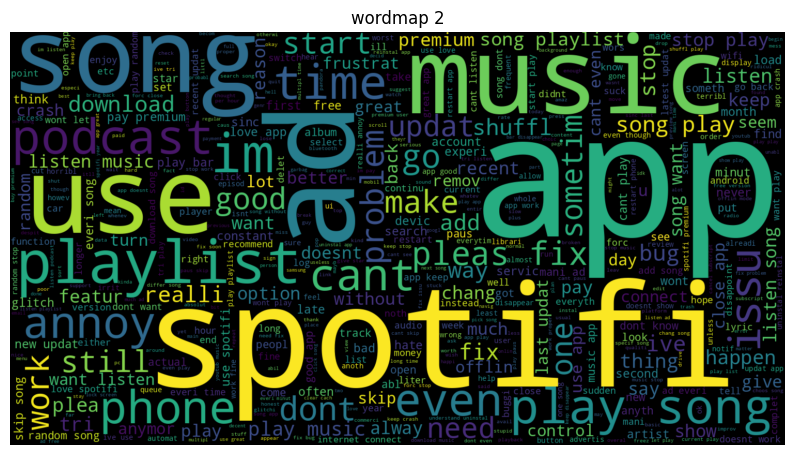

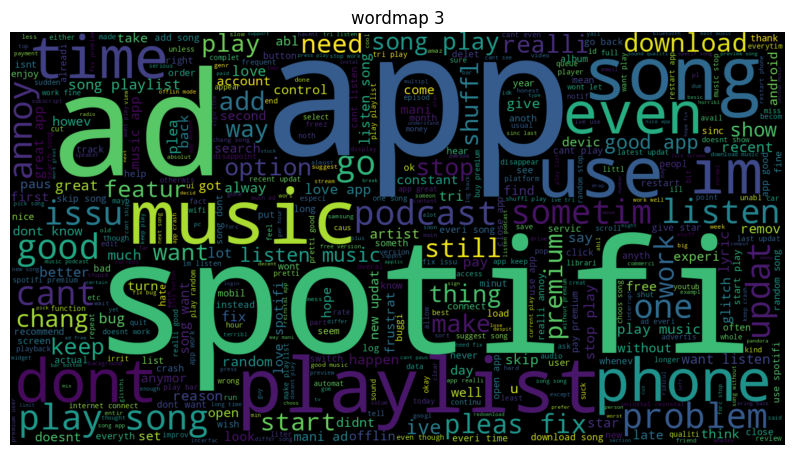

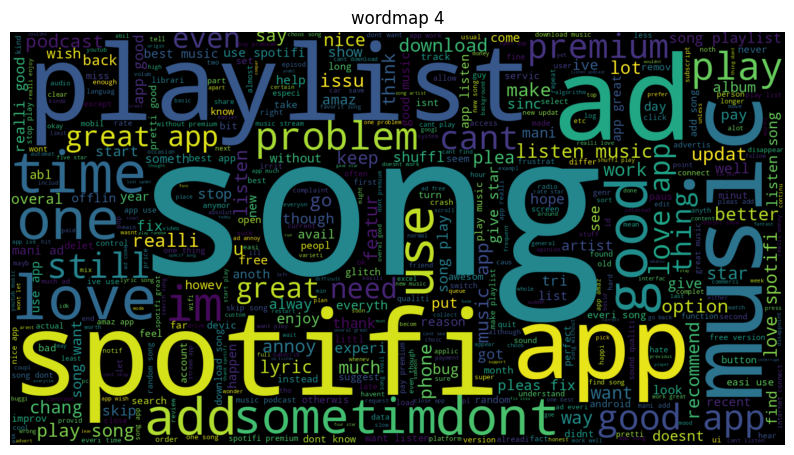

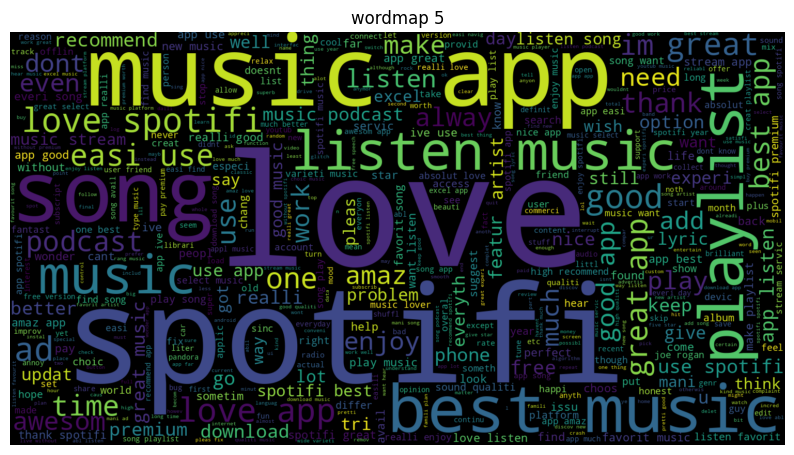

In [86]:
for i in [1,2,3,4,5]:
    wc_most_commons_words(df, i)

In [95]:
df.head()

,Review,Rating
0,great music servic audio high qualiti app easi...,5
1,pleas ignor previous negat rate app super grea...,5
2,popup get best spotifi experi android annoy pl...,4
3,realli buggi terribl use recent,1
4,dear spotifi get song didnt put playlist shuff...,1


In [96]:
df['Rating'] = df['Rating'] - 1

In [97]:
df.head()

,Review,Rating
0,great music servic audio high qualiti app easi...,4
1,pleas ignor previous negat rate app super grea...,4
2,popup get best spotifi experi android annoy pl...,3
3,realli buggi terribl use recent,0
4,dear spotifi get song didnt put playlist shuff...,0


In [98]:
seed = 42
X = df['Review']
y = df['Rating']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [100]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((49114,), (49114,), (12279,), (12279,))

In [101]:
from sklearn.utils import class_weight

In [108]:
class_weights = list(class_weight.compute_class_weight(class_weight='balanced',
                                                       classes=np.unique(df['Rating']),
                                                       y=df['Rating']))

In [115]:
df['Rating'].value_counts().index

Int64Index([4, 0, 3, 1, 2], dtype='int64')

In [112]:
class_weights.sort()

In [114]:
class_weights

[0.5593895216400911,
 0.6969745132542431,
 1.5679478993742817,
 1.7259769468653359,
 1.7844208690597296]

In [117]:
weights = {
    4 : class_weights[0],
    0 : class_weights[1],
    3 : class_weights[2],
    1 : class_weights[3],
    2 : class_weights[4]
}
weights

{4: 0.5593895216400911,
 0: 0.6969745132542431,
 3: 1.5679478993742817,
 1: 1.7259769468653359,
 2: 1.7844208690597296}

In [118]:
import tensorflow as tf